In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8782,8783,15809057,Lu,600,Spain,Female,27,6,0.00,2,1,1,172031.22,0
5523,5524,15625586,Monaldo,717,France,Male,35,4,0.00,1,1,1,167573.06,0
2701,2702,15797010,Shen,649,France,Female,31,2,0.00,2,1,0,15200.61,0
7411,7412,15698749,He,626,Germany,Female,23,6,85897.95,1,1,0,109742.80,0
3705,3706,15769645,Senior,612,France,Female,35,3,0.00,1,1,1,48108.72,0


In [3]:
df.shape

(10000, 14)

In [4]:
df1=df.drop(['RowNumber','CustomerId','Surname'], axis='columns')

In [5]:
df1.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1501,661,France,Female,31,7,144162.30,2,1,1,14490.79,0
4571,598,Germany,Male,20,8,180293.84,2,1,1,29552.70,0
2206,609,France,Male,34,1,0.00,1,1,1,181177.90,0
7810,756,Germany,Female,34,2,148200.72,1,0,0,194584.48,0
5572,565,France,Male,34,6,0.00,1,1,1,63173.64,0


In [6]:
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df1.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

cols_to_scale=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])

In [9]:
def get_unique(df):
    for cols in df.columns:
        print(f'{cols} : {df[cols].unique()}\n')

In [10]:
get_unique(df1)

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [11]:
df2=pd.get_dummies(data=df1,columns=['Geography','Gender'])

In [12]:
get_unique(df2)

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [13]:
df2['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(df2.drop('Exited',axis='columns'),df2['Exited'],train_size=0.9,stratify=df2['Exited'])

In [15]:
X_train.shape,y_test.shape

((9000, 13), (1000,))

In [16]:
y_train.value_counts()

0    7167
1    1833
Name: Exited, dtype: int64

In [17]:
import tensorflow as tf
from tensorflow import keras

model=tf.keras.Sequential([
    keras.layers.Dense(13,input_dim=13,activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(3,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
282/282 [==============================] - 4s 3ms/step - loss: 0.5380 - accuracy: 0.7646
Epoch 2/100
282/282 [==============================] - 1s 3ms/step - loss: 0.4742 - accuracy: 0.7961
Epoch 3/100
282/282 [==============================] - 1s 3ms/step - loss: 0.4627 - accuracy: 0.7963
Epoch 4/100
282/282 [==============================] - 1s 3ms/step - loss: 0.4529 - accuracy: 0.7963
Epoch 5/100
282/282 [==============================] - 1s 3ms/step - loss: 0.4439 - accuracy: 0.7984
Epoch 6/100
282/282 [==============================] - 1s 3ms/step - loss: 0.4334 - accuracy: 0.8101
Epoch 7/100
282/282 [==============================] - 1s 3ms/step - loss: 0.4249 - accuracy: 0.8152
Epoch 8/100
282/282 [==============================] - 1s 3ms/step - loss: 0.4191 - accuracy: 0.8180
Epoch 9/100
282/282 [==============================] - 1s 3ms/step - loss: 0.4131 - accuracy: 0.8196
Epoch 10/100
282/282 [==============================] - 1s 3ms/step - loss: 0.4094 - accura

In [18]:
import numpy as np
y_pred=model.predict(X_test)
y_pred_final=np.round(y_pred)
y_pred[:10]

32/32 [==============================] - 0s 2ms/step


array([[0.14462002],
       [0.10701113],
       [0.59645486],
       [0.09329557],
       [0.47008845],
       [0.00863363],
       [0.323548  ],
       [0.18532065],
       [0.04172442],
       [0.8657882 ]], dtype=float32)

In [19]:
y_pred_final[:10]

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.78      0.46      0.57       204

    accuracy                           0.86      1000
   macro avg       0.82      0.71      0.75      1000
weighted avg       0.85      0.86      0.85      1000



In [21]:
def get_model(X_train,y_train,X_test,y_test):
    model=tf.keras.Sequential([
        keras.layers.Dense(13,input_dim=13,activation='relu'),
        keras.layers.Dense(6,activation='relu'),
        keras.layers.Dense(3,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(
        loss='binary_crossentropy',
        metrics=['accuracy'],
        optimizer='adam'
    )

    model.fit(X_train,y_train,epochs=100)

    y_pred=np.round(model.predict(X_test))

    print(classification_report(y_test,y_pred))

    return model

# Method 1 : Use of Undersampling

In [22]:
count_class_0,count_class_1=df2['Exited'].value_counts()

df_class_1=df2[df2['Exited']==1]
df_class_0=df2[df2['Exited']==0]

In [23]:
count_class_0,count_class_1

(7963, 2037)

In [24]:
df_class_0_under=df_class_0.sample(count_class_1)

In [25]:
df_class_0_under.shape,df_class_1.shape

((2037, 14), (2037, 14))

In [26]:
dfm1=pd.concat([df_class_0_under,df_class_1],axis=0)

X_train, X_test, y_train, y_test=train_test_split(dfm1.drop('Exited',axis='columns'),dfm1['Exited'],train_size=0.9,stratify=dfm1['Exited'])

In [27]:
model=get_model(X_train,y_train,X_test,y_test)

Epoch 1/100
115/115 [==============================] - 1s 3ms/step - loss: 0.6843 - accuracy: 0.5927
Epoch 2/100
115/115 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.6227
Epoch 3/100
115/115 [==============================] - 0s 3ms/step - loss: 0.6622 - accuracy: 0.6298
Epoch 4/100
115/115 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.6451
Epoch 5/100
115/115 [==============================] - 0s 3ms/step - loss: 0.6421 - accuracy: 0.6607
Epoch 6/100
115/115 [==============================] - 0s 3ms/step - loss: 0.6333 - accuracy: 0.6656
Epoch 7/100
115/115 [==============================] - 0s 3ms/step - loss: 0.6243 - accuracy: 0.6768
Epoch 8/100
115/115 [==============================] - 0s 3ms/step - loss: 0.6176 - accuracy: 0.6841
Epoch 9/100
115/115 [==============================] - 0s 3ms/step - loss: 0.6088 - accuracy: 0.6869
Epoch 10/100
115/115 [==============================] - 0s 3ms/step - loss: 0.6004 - accura

# Comparison with Normal Neural Network Model

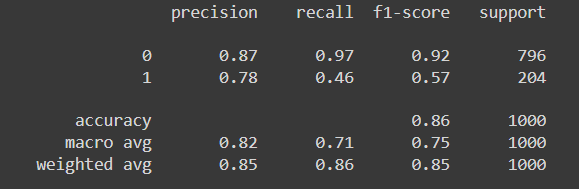

# Method 2 : Use of Oversampling

In [28]:
count_class_0,count_class_1

(7963, 2037)

In [29]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)

In [30]:
df_class_1_over.shape,df_class_0.shape

((7963, 14), (7963, 14))

In [31]:
df_final_over=pd.concat([df_class_1_over,df_class_0],axis=0)

df_final_over['Exited'].value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [32]:
X_train, X_test, y_train, y_test=train_test_split(df_final_over.drop('Exited',axis='columns'),df_final_over['Exited'],train_size=0.9,stratify=df_final_over['Exited'])

get_model(X_train,y_train,X_test,y_test)

Epoch 1/100
448/448 [==============================] - 2s 3ms/step - loss: 0.6700 - accuracy: 0.6028
Epoch 2/100
448/448 [==============================] - 1s 3ms/step - loss: 0.6012 - accuracy: 0.6815
Epoch 3/100
448/448 [==============================] - 1s 3ms/step - loss: 0.5514 - accuracy: 0.7197
Epoch 4/100
448/448 [==============================] - 1s 3ms/step - loss: 0.5230 - accuracy: 0.7474
Epoch 5/100
448/448 [==============================] - 1s 3ms/step - loss: 0.5068 - accuracy: 0.7548
Epoch 6/100
448/448 [==============================] - 1s 3ms/step - loss: 0.4971 - accuracy: 0.7590
Epoch 7/100
448/448 [==============================] - 2s 4ms/step - loss: 0.4898 - accuracy: 0.7625
Epoch 8/100
448/448 [==============================] - 2s 4ms/step - loss: 0.4860 - accuracy: 0.7636
Epoch 9/100
448/448 [==============================] - 2s 4ms/step - loss: 0.4826 - accuracy: 0.7645
Epoch 10/100
448/448 [==============================] - 1s 3ms/step - loss: 0.4798 - accura

# Comparison with Normal Neural Network

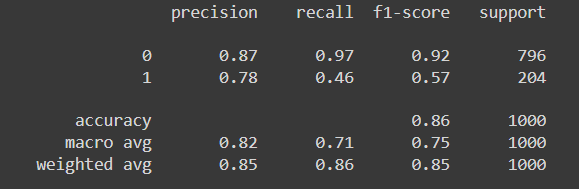

# Method 3 : Use of SMOTE

In [33]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')

In [34]:
X_sm,y_sm=smote.fit_resample(df2.drop('Exited',axis='columns'),df2['Exited'])

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X_sm,y_sm,train_size=0.9,stratify=y_sm)

In [36]:
y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [37]:
get_model(X_train,y_train,X_test,y_test)

Epoch 1/100
448/448 [==============================] - 2s 3ms/step - loss: 0.6731 - accuracy: 0.5894
Epoch 2/100
448/448 [==============================] - 1s 3ms/step - loss: 0.6185 - accuracy: 0.6883
Epoch 3/100
448/448 [==============================] - 1s 3ms/step - loss: 0.5856 - accuracy: 0.7157
Epoch 4/100
448/448 [==============================] - 1s 3ms/step - loss: 0.5576 - accuracy: 0.7404
Epoch 5/100
448/448 [==============================] - 1s 3ms/step - loss: 0.5365 - accuracy: 0.7530
Epoch 6/100
448/448 [==============================] - 1s 3ms/step - loss: 0.5209 - accuracy: 0.7575
Epoch 7/100
448/448 [==============================] - 1s 3ms/step - loss: 0.5093 - accuracy: 0.7605
Epoch 8/100
448/448 [==============================] - 1s 3ms/step - loss: 0.4990 - accuracy: 0.7636
Epoch 9/100
448/448 [==============================] - 1s 3ms/step - loss: 0.4934 - accuracy: 0.7638
Epoch 10/100
448/448 [==============================] - 2s 4ms/step - loss: 0.4882 - accura

# Comparison with Normal Neural Network

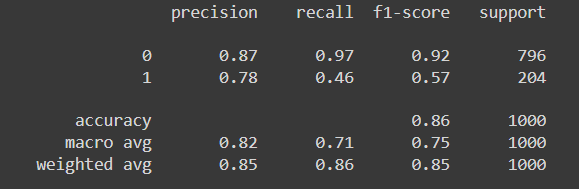

# Method 4 : Use of Ensemble

In [38]:
count_class_0,count_class_1

(7963, 2037)

In [40]:
X_train, X_test, y_train, y_test=train_test_split(df2.drop('Exited',axis='columns'),df2['Exited'],train_size=0.9,stratify=df2['Exited'],)

In [41]:
def get_batch(df_majority,df_minority,start,end):
#    df_class_1=df2[df2['Exited']==1]
#    df_class_0=df2[df2['Exited']==0]
    df_batch=pd.concat([df_majority[start:end],df_minority],axis=0)

    X_train=df_batch.drop('Exited',axis='columns')
    y_train=df_batch['Exited']

    return X_train,y_train

In [45]:
X_train,y_train=get_batch(df_class_0,df_class_1,0,2037)
model4v1=get_model(X_train,y_train,X_test,y_test)

Epoch 1/100
128/128 [==============================] - 1s 3ms/step - loss: 0.6883 - accuracy: 0.5859
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.6747 - accuracy: 0.6122
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.6325
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.6520 - accuracy: 0.6524
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.6429 - accuracy: 0.6645
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.6351 - accuracy: 0.6743
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.6271 - accuracy: 0.6745
Epoch 8/100
128/128 [==============================] - 0s 3ms/step - loss: 0.6205 - accuracy: 0.6865
Epoch 9/100
128/128 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.6870
Epoch 10/100
128/128 [==============================] - 0s 3ms/step - loss: 0.6028 - accura

In [48]:
y_pred1=model4v1.predict(X_test)

32/32 [==============================] - 0s 2ms/step


In [46]:
X_train,y_train=get_batch(df_class_0,df_class_1,2037,4074)
model4v2=get_model(X_train,y_train,X_test,y_test)

Epoch 1/100
128/128 [==============================] - 1s 6ms/step - loss: 0.6657 - accuracy: 0.6065
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.6384 - accuracy: 0.6448
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.6252 - accuracy: 0.6546
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.6183 - accuracy: 0.6647
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.6649
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.6019 - accuracy: 0.6681
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5947 - accuracy: 0.6804
Epoch 8/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5878 - accuracy: 0.6919
Epoch 9/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5829 - accuracy: 0.6888
Epoch 10/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5788 - accura

In [49]:
y_pred2=model4v2.predict(X_test)

32/32 [==============================] - 0s 2ms/step


In [47]:
X_train,y_train=get_batch(df_class_0,df_class_1,4074,7963)
model4v3=get_model(X_train,y_train,X_test,y_test)

Epoch 1/100
186/186 [==============================] - 1s 3ms/step - loss: 0.6220 - accuracy: 0.6515
Epoch 2/100
186/186 [==============================] - 1s 3ms/step - loss: 0.5894 - accuracy: 0.6779
Epoch 3/100
186/186 [==============================] - 1s 3ms/step - loss: 0.5692 - accuracy: 0.7179
Epoch 4/100
186/186 [==============================] - 1s 3ms/step - loss: 0.5538 - accuracy: 0.7246
Epoch 5/100
186/186 [==============================] - 1s 3ms/step - loss: 0.5424 - accuracy: 0.7335
Epoch 6/100
186/186 [==============================] - 1s 3ms/step - loss: 0.5355 - accuracy: 0.7346
Epoch 7/100
186/186 [==============================] - 1s 3ms/step - loss: 0.5283 - accuracy: 0.7383
Epoch 8/100
186/186 [==============================] - 1s 3ms/step - loss: 0.5212 - accuracy: 0.7430
Epoch 9/100
186/186 [==============================] - 1s 3ms/step - loss: 0.5141 - accuracy: 0.7460
Epoch 10/100
186/186 [==============================] - 1s 3ms/step - loss: 0.5055 - accura

In [50]:
y_pred3=model4v3.predict(X_test)

32/32 [==============================] - 0s 3ms/step


In [51]:
y_pred_final=y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

In [52]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79       796
           1       0.41      0.89      0.56       204

    accuracy                           0.72      1000
   macro avg       0.69      0.78      0.68      1000
weighted avg       0.85      0.72      0.75      1000



# Comparison with Normal Neural Network

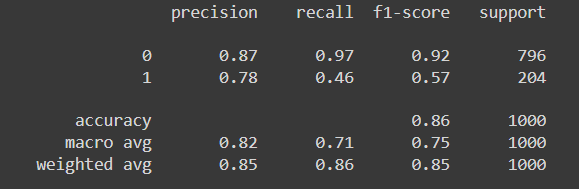

# Method 5 : Use of Focal Loss

In [58]:
import tensorflow_addons as tfa

In [53]:
X_train, X_test, y_train, y_test=train_test_split(df2.drop('Exited',axis='columns'),df2['Exited'],train_size=0.9,stratify=df2['Exited'])

In [60]:
import tensorflow as tf
from tensorflow import keras

model5=tf.keras.Sequential([
    keras.layers.Dense(13,input_dim=13,activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(3,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model5.compile(
    loss=tfa.losses.SigmoidFocalCrossEntropy(alpha=0.25,gamma=2),
    metrics=['accuracy'],
    optimizer='adam'
)

model5.fit(X_train,y_train,epochs=100)

Epoch 1/100
282/282 [==============================] - 2s 4ms/step - loss: 0.0665 - accuracy: 0.7882
Epoch 2/100
282/282 [==============================] - 1s 3ms/step - loss: 0.0467 - accuracy: 0.7963
Epoch 3/100
282/282 [==============================] - 1s 3ms/step - loss: 0.0458 - accuracy: 0.7963
Epoch 4/100
282/282 [==============================] - 1s 3ms/step - loss: 0.0450 - accuracy: 0.7963
Epoch 5/100
282/282 [==============================] - 1s 3ms/step - loss: 0.0441 - accuracy: 0.7963
Epoch 6/100
282/282 [==============================] - 1s 3ms/step - loss: 0.0431 - accuracy: 0.7963
Epoch 7/100
282/282 [==============================] - 1s 3ms/step - loss: 0.0417 - accuracy: 0.7963
Epoch 8/100
282/282 [==============================] - 1s 3ms/step - loss: 0.0403 - accuracy: 0.7963
Epoch 9/100
282/282 [==============================] - 1s 3ms/step - loss: 0.0391 - accuracy: 0.8009
Epoch 10/100
282/282 [==============================] - 1s 3ms/step - loss: 0.0381 - accura

In [62]:
y_pred5=model5.predict(X_test)
y_pred5=np.round(y_pred5)

print(classification_report(y_test,y_pred5))

32/32 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       796
           1       0.90      0.31      0.46       204

    accuracy                           0.85      1000
   macro avg       0.87      0.65      0.69      1000
weighted avg       0.86      0.85      0.82      1000



# Comparison with Normal Neural Network

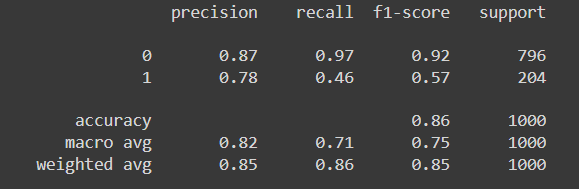